# Pandas Express - Amir
# TTC-Delays project
Team Members: 

Gaspare Castagna

Amirhossein Heidari

Avery Hoffer

Michael Metallo

In [1]:
import numpy as numpy
import pandas as pd
import os
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df_bus_delay=pd.read_csv('bus_delays.csv')
df_bus_delay.head(10000000)

C:\Users\ASuS\AppData\Local\Temp\ipykernel_9712\3754450213.py:1: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bus_delay=pd.read_csv('bus_delays.csv')


,Unnamed: 0,Route,Day,Location,Incident,Min Delay,Min Gap,Vehicle,DateTime,copy,analysis
0,0,95,Wednesday,York Mills station,Mechanical,10.0,20.0,1734.0,2014-01-01 00:23:00,yorkmillsstation,yorkmillsstation
1,1,102,Wednesday,Entire run for route,General Delay,33.0,66.0,8110.0,2014-01-01 00:55:00,entirerunforroute,entirerunforroute
2,2,54,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,7478.0,2014-01-01 01:28:00,lawrence&warden,warden
3,3,112,Wednesday,Kipling Station,Emergency Services,18.0,36.0,8084.0,2014-01-01 01:30:00,kiplingstation,kiplingstation
4,4,24,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,7843.0,2014-01-01 01:37:00,ellesmere&victoriapark,ellesmere&victoriapark
...,...,...,...,...,...,...,...,...,...,...,...
588508,588508,32,Saturday,EGLINTON AND EDITH (W,Mechanical,2.0,24.0,1085.0,NaN,edithw&eglinton,islington
588509,588509,113,Saturday,DANFORTH AND DAWES,Vision,20.0,40.0,8589.0,NaN,danforth&dawes,danforth&dawes
588510,588510,72,Saturday,LOWER SHERBOURNE AND L,Security,18.0,36.0,8493.0,NaN,l&lowersherbourne,sherbourne
588511,588511,22,Saturday,BINGHAM LOOP,Cleaning - Unsanitary,10.0,20.0,8582.0,NaN,binghamloop,binghamloop


In [85]:
import plotly.express as px

Incident_data = df_bus_delay['Incident'].value_counts().reset_index()
Incident_data_major = Incident_data[Incident_data['count'] >= 5000]

# Set the size of the figure using the width and height parameters
fig = px.pie(
    Incident_data_major,
    names='Incident',
    values='count',
    title='Pie Chart Example',
    width=700,
    height=600,
    color_discrete_sequence=px.colors.qualitative.Set2_r  # Use a more vibrant color palette
)

fig.update_traces(
    texttemplate='',  # Set the text template to an empty string to hide percentages
    marker=dict(line=dict(color='black', width=2))  # Add borders to the pie chart
)

# Customize the text font
fig.update_layout(font=dict(family='Arial', size=18))

fig.show()

C:\Users\ASuS\AppData\Local\Temp\ipykernel_9712\1600918903.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



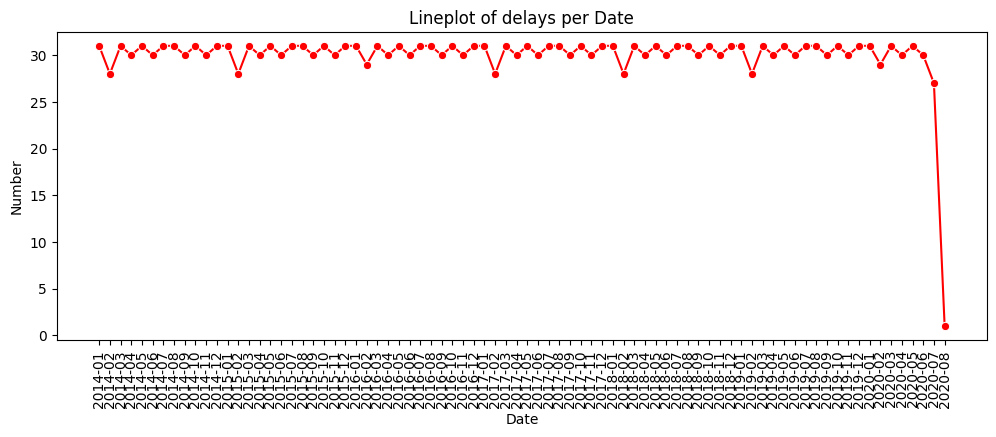

,month_year,count
0,2014-01,31
75,2014-02,28
41,2014-03,31
50,2014-04,30
44,2014-05,31
...,...,...
47,2020-04,30
26,2020-05,31
46,2020-06,30
78,2020-07,27


In [4]:

df_bus_delay['DateTime'] = pd.to_datetime(df_bus_delay['DateTime'])
df_bus_delay['just_date'] = df_bus_delay['DateTime'].dt.date
date_delays = df_bus_delay['just_date'].value_counts().reset_index()
date_delays = date_delays.sort_values(by='just_date')


date_delays['just_date'] = pd.to_datetime(date_delays['just_date'])
date_delays['month_year'] = date_delays['just_date'].dt.strftime('%Y-%m')

date_delays_2=date_delays['month_year'].value_counts().reset_index()
date_delays_2 = date_delays_2.sort_values(by='month_year')
date_delays_2 = date_delays_2.dropna(subset=['month_year'])

date_delays_2.head(5000000)


plt.figure(figsize=(12, 4))
ax = sns.lineplot(data=date_delays_2, x='month_year', y='count', color='red', marker='o')
ax.set(title='Lineplot of delays per Date', xlabel='Date', ylabel='Number')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()
date_delays_2.head(5000000)


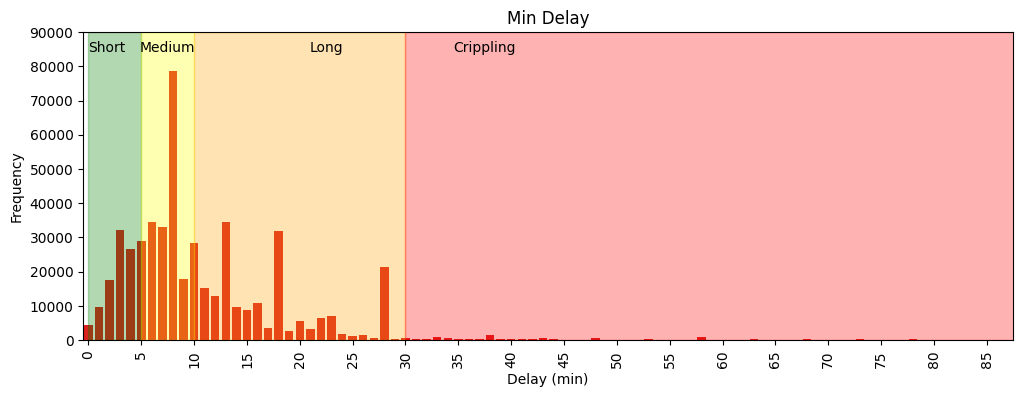

,Min Delay,count
23,2.0,4361
17,3.0,9605
12,4.0,17621
4,5.0,32121
9,6.0,26585
...,...,...
65,85.0,141
118,86.0,60
104,87.0,67
121,88.0,56


In [5]:
df_duration = df_bus_delay['Min Delay'].value_counts().reset_index()
df_duration = df_duration[(df_duration['Min Delay'] > 1) & (df_duration['Min Delay'] < 90)]
df_duration = df_duration.sort_values(by='Min Delay')

plt.figure(figsize=(12, 4))
ax = sns.barplot(data=df_duration, x='Min Delay', y='count', color='red')
ax.set(title='Min Delay', xlabel='Delay (min)', ylabel='Frequency')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set x-axis ticks for every 5 minutes
xticks = np.arange(0, 90, 5)
ax.set_ylim(0, 90000)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=90)


# Add regions for short, medium, long, and crippling waiting times
ax.axvspan(0, 5, alpha=0.3, color='green', label='Short')
ax.axvspan(5, 10, alpha=0.3, color='yellow', label='Medium')
ax.axvspan(10, 30, alpha=0.3, color='orange', label='Long')
ax.axvspan(30, 90, alpha=0.3, color='red', label='Crippling')

# Add labels inside the regions
ax.text(1.75, ax.get_ylim()[1] * 0.95, 'Short', ha='center', va='center', color='black')
ax.text(7.5, ax.get_ylim()[1] * 0.95, 'Medium', ha='center', va='center', color='black')
ax.text(22.5, ax.get_ylim()[1] * 0.95, 'Long', ha='center', va='center', color='black')
ax.text(37.5, ax.get_ylim()[1] * 0.95, 'Crippling', ha='center', va='center', color='black')

# Set x-axis limit explicitly to remove gaps
ax.set_xlim(-0.5, len(df_duration) - 0.5)

plt.show()
df_duration.head(1000)

In [171]:
df_bus_delay['Route'] = pd.to_numeric(df_bus_delay['Route'], errors='coerce')
# Drop rows where 'Route' is NaN
df_bus_delay.dropna(subset=['Route'], inplace=True)

df_routes = df_bus_delay['Route'].value_counts().reset_index()
df_routes = df_routes[df_routes['count']>100]
df_routes = df_routes.sort_values(by='count',ascending=False)
#df_routes.head()
df_routes_top20=df_routes.head(21)

df_routes_top20['Route'] = df_routes_top20['Route'].astype(str)  # Convert 'Route' to string
df_routes_top20 = df_routes_top20.sort_values(by='count', ascending=False)  # Sort by count
df_routes_top20.head(11)



C:\Users\ASuS\AppData\Local\Temp\ipykernel_9712\775986200.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Route,count
0,29.0,14523
1,52.0,13691
2,32.0,13419
3,36.0,12650
4,54.0,10931
5,53.0,10879
6,95.0,10423
7,60.0,10090
8,35.0,9847
9,102.0,9538


In [210]:

list_avoidable = ['Late Leaving Garage','Cleaning','Late Entering Service','Cleaning - Unsanitary','Cleaning - Disinfection', 'Late Leaving Garage - Operations','Late Leaving Garage - Management','Investigation']
df_delays_avoidable=df_bus_delay[df_bus_delay['Incident'].isin(list_avoidable)]
df_delays_avoidable.head()
print(df_delays_avoidable['Incident'].unique())

# Count the frequency of each incident
df_delays_avoidable_count = df_delays_avoidable['Incident'].value_counts().reset_index()
df_delays_avoidable_count.head()
# Create a doughnut chart using plotly
fig = px.pie(df_delays_avoidable_count, names='Incident', values='count', title='Frequency of Incidents', hole=0.4, width=1200, height=700,
             color_discrete_sequence=px.colors.qualitative.Set2
             )

# Manually add text labels with both percent and label
fig.update_traces(textinfo='percent+label', 
                  customdata=df_delays_avoidable_count['Incident'],
                  hovertemplate='%{label}: %{percent}<br>Count: %{value}<br>Custom Data: %{customdata}'
                 )

# Customize the text font
fig.update_layout(font=dict(family='Arial', size=18))

fig.update_traces(
    texttemplate='',  # Set the text template to an empty string to hide percentages
    marker=dict(line=dict(color='black', width=2))  # Add borders to the pie chart
)

# Show the plot
fig.show()

['Investigation' 'Late Leaving Garage' 'Late Leaving Garage - Management'
 'Cleaning' 'Late Leaving Garage - Operations' 'Late Entering Service'
 'Cleaning - Unsanitary' 'Cleaning - Disinfection']


In [125]:
# Define the bins and labels for different delay types
bins = [0, 5, 10, 30, float('inf')]  # bin edges
labels = ['short', 'medium', 'long', 'crippling']

# Create the 'Delay Type' column using pd.cut
df_bus_delay['Delay Type'] = pd.cut(df_bus_delay['Min Delay'], bins=bins, labels=labels, right=False)
df_bus_delay.head()

,Unnamed: 0,Route,Day,Location,Incident,Min Delay,Min Gap,Vehicle,DateTime,copy,analysis,just_date,Delay Type
0,0,95.0,Wednesday,York Mills station,Mechanical,10.0,20.0,1734.0,2014-01-01 00:23:00,yorkmillsstation,yorkmillsstation,2014-01-01,long
1,1,102.0,Wednesday,Entire run for route,General Delay,33.0,66.0,8110.0,2014-01-01 00:55:00,entirerunforroute,entirerunforroute,2014-01-01,crippling
2,2,54.0,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,7478.0,2014-01-01 01:28:00,lawrence&warden,warden,2014-01-01,long
3,3,112.0,Wednesday,Kipling Station,Emergency Services,18.0,36.0,8084.0,2014-01-01 01:30:00,kiplingstation,kiplingstation,2014-01-01,long
4,4,24.0,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,7843.0,2014-01-01 01:37:00,ellesmere&victoriapark,ellesmere&victoriapark,2014-01-01,long


In [199]:
# Define the bins and labels for different delay types
bins = [0, 5, 10, 30, float('inf')]
labels = ['short', 'medium', 'long', 'crippling']

# Create the 'Delay Type' column using pd.cut
df_bus_delay['Delay Type'] = pd.cut(df_bus_delay['Min Delay'], bins=bins, labels=labels, right=False)

# Group by 'Day' and 'Delay Type', and aggregate 'Min Delay' with mean and count
df_weekday_data_1 = df_bus_delay.groupby(['Day', 'Delay Type'])['Min Delay'].agg(['mean', 'count']).unstack('Delay Type').reset_index()

# Flatten the multi-level column index and reset column names
df_weekday_data_1.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in df_weekday_data_1.columns]

df_weekday_data_2 = df_bus_delay.groupby('Day')['Min Delay'].agg(mean_min_delay='mean', count_min_delay='count').reset_index()

df_weekday_data= pd.merge(df_weekday_data_1, df_weekday_data_2, on='Day')

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Day' column to Categorical with the specified order
df_weekday_data['Day'] = pd.Categorical(df_weekday_data['Day'], categories=day_order, ordered=True)

# Sort the DataFrame based on the 'Day' column
df_weekday_data = df_weekday_data.sort_values(by='Day')

df_weekday_data.head(10)

,Day,mean_short,mean_medium,mean_long,mean_crippling,count_short,count_medium,count_long,count_crippling,mean_min_delay,count_min_delay
1,Monday,3.429051,7.027482,14.545234,37.755720,5060,24416,40876,4589,12.766656,74941
5,Tuesday,3.423295,7.000836,14.605151,37.856333,5821,27498,45078,4761,12.639085,83158
6,Wednesday,3.391547,7.010679,14.677534,38.483248,5726,27250,46256,4865,12.801955,84097
4,Thursday,3.433479,7.029548,14.721897,37.918824,5705,26905,46756,5137,12.920772,84503
0,Friday,3.433292,7.028519,14.645369,38.142171,5599,26509,46265,5205,12.941683,83578
2,Saturday,3.354253,7.312982,14.821397,36.984769,1928,13496,30593,5121,14.626951,51138
3,Sunday,3.459908,7.353191,14.805511,35.980792,1746,9165,26238,5154,15.302579,42303


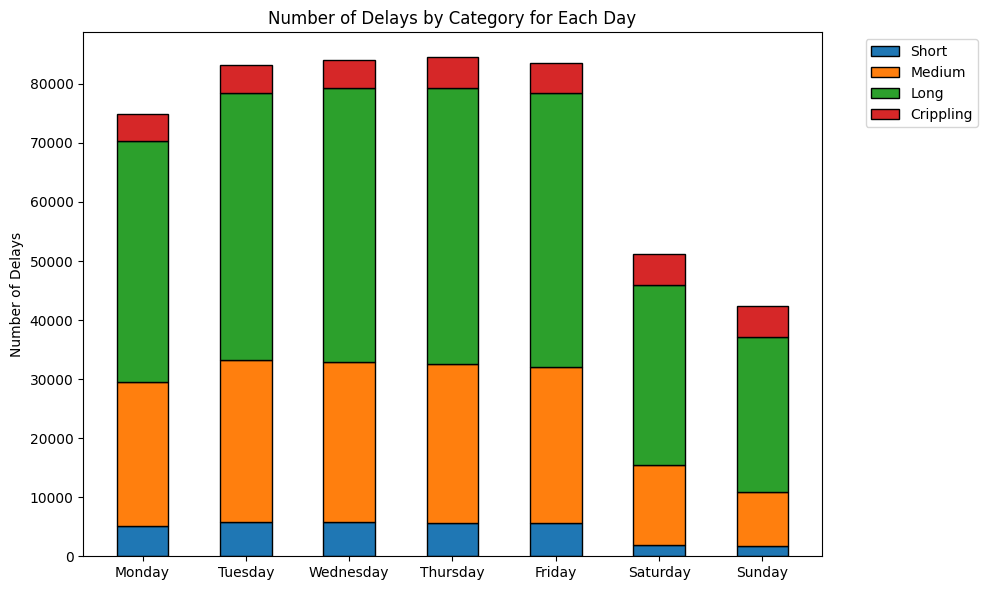

In [211]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for counts of short, medium, long, crippling with adjusted x positions
bar_width = 0.5  # Adjust the width as needed
bar_positions = np.arange(1, len(df_weekday_data) + 1)

# Bar plot for counts of short, medium, long, crippling
ax.bar(bar_positions , df_weekday_data['count_short'], width=bar_width, label='Short', edgecolor='black')
ax.bar(bar_positions, df_weekday_data['count_medium'], bottom=df_weekday_data['count_short'], width=bar_width, label='Medium', edgecolor='black')
ax.bar(bar_positions, df_weekday_data['count_long'], bottom=df_weekday_data['count_short'] + df_weekday_data['count_medium'], width=bar_width, label='Long', edgecolor='black')
ax.bar(bar_positions, df_weekday_data['count_crippling'], bottom=df_weekday_data['count_short'] + df_weekday_data['count_medium'] + df_weekday_data['count_long'], width=bar_width, label='Crippling', edgecolor='black')

# Customize the plot
ax.set_ylabel('Number of Delays')
ax.set_title('Number of Delays by Category for Each Day')
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_weekday_data['Day'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the chart border

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [203]:
# Group by 'Route' and 'Delay Type', and aggregate 'Min Delay' with mean and count
df_routes_1 = df_bus_delay.groupby(['Route', 'Delay Type'])['Min Delay'].agg(['mean', 'count']).unstack('Delay Type').reset_index()
# Flatten the multi-level column index and reset column names
df_routes_1.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in df_routes_1.columns]

df_routes_2 = df_bus_delay.groupby('Route')['Min Delay'].agg(mean_min_delay='mean', count_min_delay='count').reset_index()

df_routes= pd.merge(df_routes_1, df_routes_2, on='Route')

# Sort the DataFrame based on the 'count_min_delay' column
df_routes = df_routes.sort_values(by='count_min_delay',ascending=False )
df_routes_top20=df_routes.head(20)
df_routes_top20.head()

,Route,mean_short,mean_medium,mean_long,mean_crippling,count_short,count_medium,count_long,count_crippling,mean_min_delay,count_min_delay
28,29.0,3.487784,6.766607,12.951785,41.410638,4625,7271,2157,470,7.762239,14523
51,52.0,3.229219,6.832900,15.519300,41.051502,397,1921,10907,466,14.813162,13691
31,32.0,3.337607,7.014795,12.349062,37.815141,234,5475,7142,568,11.093450,13419
35,36.0,3.798013,5.914915,14.403602,44.485531,1208,8133,2998,311,8.672806,12650
53,54.0,3.743590,7.089709,13.679036,40.962594,273,2954,7303,401,12.651084,10931


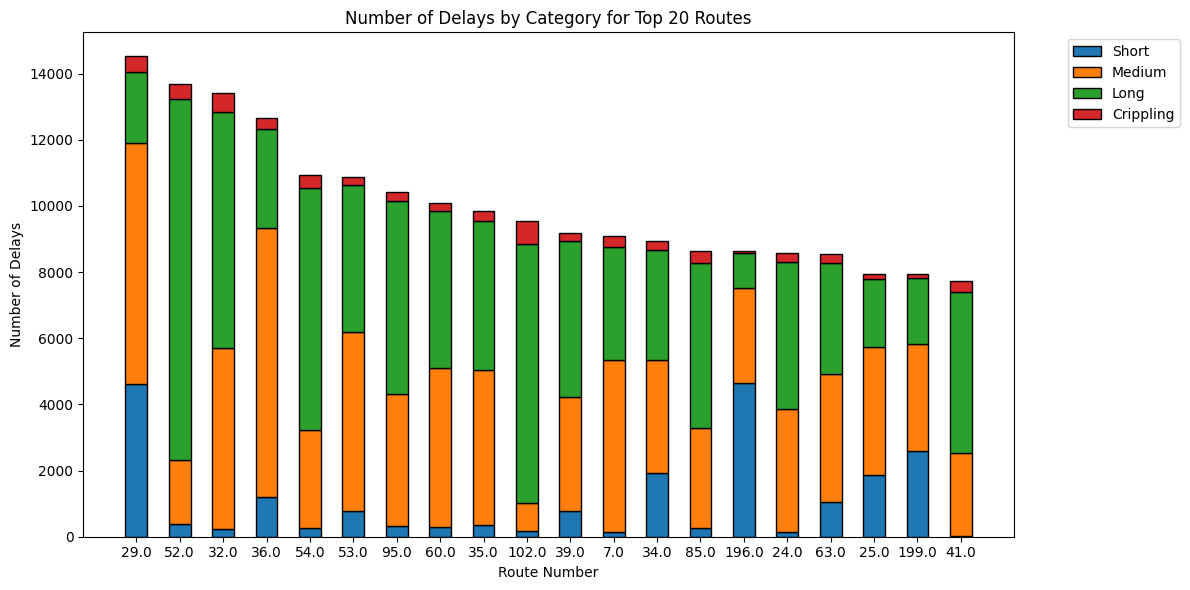

In [212]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for counts of short, medium, long, crippling with adjusted x positions
bar_width = 0.5  # Adjust the width as needed
bar_positions = np.arange(1, len(df_routes_top20) + 1)

# Bar plot for counts of short, medium, long, crippling
ax.bar(bar_positions , df_routes_top20['count_short'], width=bar_width, label='Short', edgecolor='black')
ax.bar(bar_positions, df_routes_top20['count_medium'], bottom=df_routes_top20['count_short'], width=bar_width, label='Medium',edgecolor='black')
ax.bar(bar_positions, df_routes_top20['count_long'], bottom=df_routes_top20['count_short'] + df_routes_top20['count_medium'], width=bar_width, label='Long',edgecolor='black')
ax.bar(bar_positions, df_routes_top20['count_crippling'], bottom=df_routes_top20['count_short'] + df_routes_top20['count_medium'] + df_routes_top20['count_long'], width=bar_width, label='Crippling',edgecolor='black')

# Customize the plot
ax.set_ylabel('Number of Delays')
ax.set_xlabel('Route Number')
ax.set_title('Number of Delays by Category for Top 20 Routes')
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_routes_top20['Route'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside of the chart border

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()